# CS420 Assignment 2 Q5
My initial submission was a .py file, but I have since adapted it to a Jupyter Notebook for easier reading and reference, and made some additions for explanation and further clarity.

In [1]:
# Import libraries

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize the FrozenLake-v1 environment
render_me = False
env = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=True,
               render_mode = 'human' if render_me else None)


In [3]:
# Set hyperparameters
episodes = 10000
learning_rate = 0.5 # alpha
discount_rate = 0.99 # gamma
epsilon = 0.5
epsilon_decay_rate = 0.0001
rng = np.random.default_rng()

In [4]:
# Hold episode returns
rewards_per_episode = np.zeros(episodes)

# Initialize Q-table (16 possible spaces x 4 possible actions)
q_table = np.zeros((env.observation_space.n, env.action_space.n))

## Q-learning algorithm
The while loop runs as long as the episode is neither terminated nor truncated (i.e. the agent has not yet reached the goal / fallen into a crack).

The action the agent takes depends a random number generated by `rng.random()`. The agent makes a random move if this random number is less than `epsilon` or the apparent best (greedy) action otherwise. This is the epsilon-greedy strategy.

`epsilon` is initially 1.0 and decays every episode. This ensures exploration of choices in the beginning due to a higher proportion of random actions, and greater preference for high-reward actions in later episodes (exploitation) later in training.

Eventually, the agent will take the action that have been found to have the highest Q-value for any given state, $Q(s,a)$.

In [5]:
# Q-learning algorithm
for episode in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False
    
    while (not terminated and not truncated):
        if rng.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, _ = env.step(action)
        # Update Q-table
        q_table[state, action] = q_table[state, action] + \
                                learning_rate * (reward + discount_rate * np.max(q_table[new_state])\
                                                  - q_table[state, action])
        state = new_state     

    # Decay exploration rate
    epsilon = max(epsilon - epsilon_decay_rate, 0)
    
    # Have some non-trivial learning rate if decayed to zero
    if epsilon == 0:
        learning_rate = 0.001

    # Update reward for episode
    if reward == 1:
        rewards_per_episode[episode] = 1
    
    # Print mean reward of the past 100 episodes, every 100 episodes
    if (episode + 1) % 100 == 0:
        average_return = np.mean(rewards_per_episode[-100:])
        print(f"Episode {episode + 1}/{episodes}, Average Return: {average_return}")


Episode 100/10000, Average Return: 0.0
Episode 200/10000, Average Return: 0.0
Episode 300/10000, Average Return: 0.0
Episode 400/10000, Average Return: 0.0
Episode 500/10000, Average Return: 0.0
Episode 600/10000, Average Return: 0.0
Episode 700/10000, Average Return: 0.0
Episode 800/10000, Average Return: 0.0
Episode 900/10000, Average Return: 0.0
Episode 1000/10000, Average Return: 0.0
Episode 1100/10000, Average Return: 0.0
Episode 1200/10000, Average Return: 0.0
Episode 1300/10000, Average Return: 0.0
Episode 1400/10000, Average Return: 0.0
Episode 1500/10000, Average Return: 0.0
Episode 1600/10000, Average Return: 0.0
Episode 1700/10000, Average Return: 0.0
Episode 1800/10000, Average Return: 0.0
Episode 1900/10000, Average Return: 0.0
Episode 2000/10000, Average Return: 0.0
Episode 2100/10000, Average Return: 0.0
Episode 2200/10000, Average Return: 0.0
Episode 2300/10000, Average Return: 0.0
Episode 2400/10000, Average Return: 0.0
Episode 2500/10000, Average Return: 0.0
Episode 2

Q-learning performance is plotted below.

It is not fair to take the average reward over all 10000 episodes as the agent may not do very well in the beginning (low average reward), and may do much better in later episodes. Taking the average over all 10000 episodes may create a middling and therefore unhelpful result.

In [6]:
# Take the average over 10000 episodes (not very helpful)
print(f"Average Return over all 10k episodes: {np.mean(rewards_per_episode)}")

Average Return over all 10k episodes: 0.4629


Instead, we take the average reward every 100 episodes. We can then plot this periodic average reward so that we can observe the model improving over time.

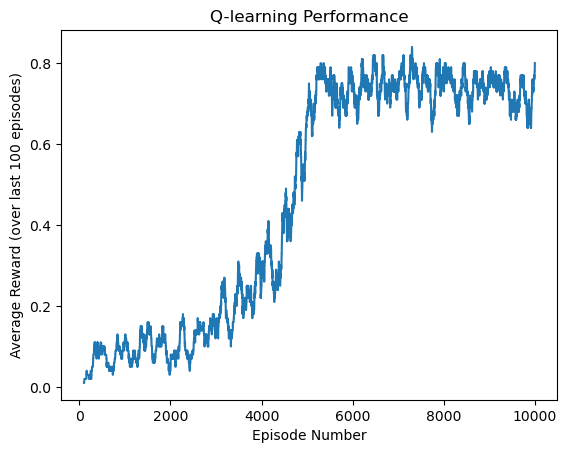

In [7]:
# Plotting average return over the last 100 episodes
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

avg_returns = moving_average(rewards_per_episode, 100)
plt.plot(np.arange(100, episodes + 1), avg_returns)
plt.xlabel('Episode Number')
plt.ylabel('Average Reward (over last 100 episodes)')
plt.title('Q-learning Performance')
plt.show()

We can observe that by the end of 10000 episodes, average reward per 100 episodes is at least 0.7, suggesting that by the end of training, the agent reaches the goal at least 0.7 of the time over a block of 100 episodes.

In [8]:
# 4x4 grid of Frozen Lake, each cell represents the max Q(s,a) value
# Columns: 0 - Left, 1 - Down, 2 - Right, 3 - Up
# Highest Q-value represents best action to take at that state
print(q_table)

[[0.57795563 0.41436022 0.41586236 0.39602191]
 [0.20590946 0.22799545 0.30454562 0.53804251]
 [0.31813657 0.2534095  0.28165511 0.4950515 ]
 [0.21363033 0.13407897 0.23437602 0.47041025]
 [0.59307907 0.34026918 0.07224935 0.18786296]
 [0.         0.         0.         0.        ]
 [0.01287352 0.00191605 0.38217627 0.00848629]
 [0.         0.         0.         0.        ]
 [0.07143513 0.1428395  0.27075349 0.62486012]
 [0.22299621 0.67215289 0.27712707 0.04884273]
 [0.63370797 0.08369945 0.10379388 0.07939677]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.16252333 0.44553849 0.77086956 0.31786149]
 [0.56786977 0.87905142 0.65927413 0.55836814]
 [0.         0.         0.         0.        ]]
